# Learning from Data - Course 

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import YouTubeVideo
from scipy.stats import multivariate_normal
from IPython.display import IFrame

<h1 style = 'color: #003366'> Vídeo Aula 1 - O problema de Aprendizagem </h1>

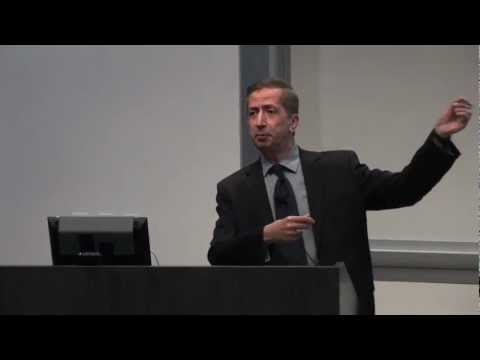

In [0]:
YouTubeVideo('mbyG85GZ0PI',width=980, height=500)

<h1 style = 'color: #003366'> Exercício de Aplicação</h1>

<p style = 'text-align: justify;padding: 0px 20px 40px'> <img src="Mídias/Imagens/aula1.png" alt="Dados dos 10 pacientes" height="90" width="150" style= "float: left;padding: 0px 10px 0px ">
    <font size="3"> Dispondo dos resultado de 2 dois exames de 10 pacientes e os respectivos estado de saúde ( doente ou não doente).
Elabore um modelo que consiga aprender com esses dados e possa predizer o estado de um 11º paciente, dispondo apenas dos 
dados dos seus dois exames.</font>

</p>

<h2 style = 'color: #336699'>  Criando um pandas.DataFrame dos dados </h2>


In [0]:
data = pd.DataFrame([[30,70,'Doente'],[40,60,'Doente'],[50,10,'Doente'],[50,30,'Doente'],[50,50,'Doente'],[70,30,'Doente'],\
                     [30,10,'Não Doente'],[30,30,'Não Doente'],[20,40,'Não Doente'],[10,30,'Não Doente'],[20,60,'Não Doente']],\
                    columns = ['exame_1','exame_2','Estado de Saude'])

In [0]:
data

,exame_1,exame_2,Estado de Saude
0,30,70,Doente
1,40,60,Doente
2,50,10,Doente
3,50,30,Doente
4,50,50,Doente
5,70,30,Doente
6,30,10,Não Doente
7,30,30,Não Doente
8,20,40,Não Doente
9,10,30,Não Doente


<h2 style = 'color: #336699'> Visualizando a dispersão dos dados</h2>

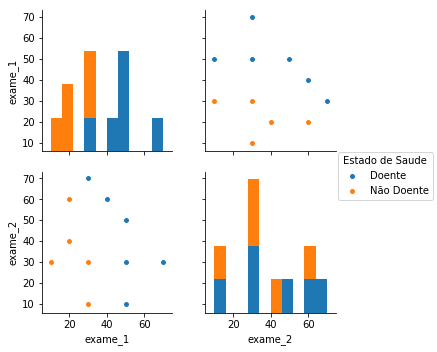

In [0]:
sns.pairplot(data,hue='Estado de Saude',vars =[ 'exame_1','exame_2'])

<h2> A seguir serão implementadas as seguintes soluções para o problema proposto: </h3>
<ol>
    <li> <a href="#nn">O vizinho mais próximo</a></li>
    <li> <a href="#knn">Os K vizinhos mais próximos</a></li>
    <li> <a href ="#perceptron"> Separação linear</a></li>
    <li> <a href = "#bayes"> Probabilidade Condicional</a></li>

<h2 id = 'nn' style='text-align: left;'> O vizinho mais próximo <img  src="Mídias/Imagens/nn_aula1.png" style="float :  right"></h2>


<h2> NN_CLASSIFIER</h2>
<p>Essa função <strong>recebe </strong> três argumentos: </p>
<ol>
    <li> trainx, uma matriz nxd onde "n" é o número de observações (número de pacientes já avaliados) e "d" as características observadas ( exames)</li>
    <li> trainy, um vetor de tamanho n, que contém o labél ( diagnóstico 'doente ou não' ) de cada paciente avaliado</li>
    <li> x, um vetor do Rd contendo os resultados dos exames de um novo paciente</li>
</ol> 
<p> Essa função <strong>retorna</strong> o label ( diagnóstico 'doente ou não') do paciente já avaliado que possui as características(exames) <strong>mais próximas</strong> as caracteristica do paciente novo (x). 


In [0]:
def nn_classifier(trainx,trainy,x):
    tempo_inicial = time.time()
    """Calculando a distancia de x para todo i pertencente n, através da distância euclidiana """
    distancias = np.sqrt(np.sum((trainx-x)**2,axis=1)) #raiz quadrada da soma do quadrado da diferença entre trainx_i e x
    
    """Escolhendo o paciente(vetor) que possui as caracteristicas mais próximas (menor distancia) 
    as do paciente x (vetor)"""
    index = np.argmin(distancias)#retorna o indice do menor item do array 'distancias
    
    """Classificar o novo paciente em função do paciente mais próximo"""
    predict = trainy[index]#acessa o label do paciente mais próximo
    tempo_final = time.time()
    print('Tempo de computação: ',tempo_final - tempo_inicial)
    """Printa na tela o Diagnóstico"""

    return predict

<p><em>Exemplo</em><p>

In [0]:
nn_classifier(data[['exame_1','exame_2']],data['Estado de Saude'],[80,80])

Tempo de computação:  0.49060678482055664


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


'Doente'

<h2 id = 'knn' height ="50" style='text-align: left'> Os K vizinhos mais próximos <img  src="Mídias/Imagens/knn_aula1.png" height ="50" width = "170"style = "float: right;" ></h2>


<h2> KNN_CLASSIFIER</h2>
<p>Essa função <strong>recebe </strong> 4 argumentos: </p>
<ol>
    <li> trainx, uma matriz nxd onde "n" é o número de observações (número de pacientes já avaliados) e "d" as características observadas ( exames)</li>
    <li> trainy, um vetor de tamanho n, que contém o labél ( diagnóstico 'doente ou não' ) de cada paciente avaliado</li>
    <li> x, um vetor do Rd contendo os resultados dos exames de um novo paciente</li>
    <li> k, um escalar </li>
</ol> 
<p> Essa função <strong>retorna</strong> o label ( diagnóstico 'doente ou não') mais recorrente num conjunto de <strong>K</strong> pacientes já avaliados que possuem as características(exames) <strong>mais próximas</strong> as caracteristicas do paciente novo (x). 


In [0]:
def knn_classifier(trainx,trainy,x,k):
    tempo_inicial = time.time()
    """Calculando a distancia de x para todo i pertencente n, através da distância euclidiana """
    distancias = np.sqrt(np.sum((trainx-x)**2,axis=1)) #raiz quadrada da soma do quadrado da diferença entre trainx_i e x
    
    """Escolhendo os 'k' pacientes(vetores) que possuem as caracteristicas mais próximas (menor distancia) 
    as do paciente x (vetor)"""
    index_1 = np.argmin(distancias) #indice do mais proximos
    index_n = np.array([np.argmin(distancias[:-i])for i in range(1,k)])#indices do 2 ao k-ésimo mais proximo
    indexs= np.append(index_1,index_n)
    
    """Classificar o novo paciente em função do label mais recorrente entre os pacientes mais próximos"""
    predictions = trainy[indexs]#acessa o label dospacientes mais próximos
    labels,qtd_labels = np.unique(predictions,return_counts = True)# quais os labels e quantos eventos com um dado label
    index = np.argmax(qtd_labels)#acessa o lebal mais recorrente
    knn_predict = labels[index]#acessa o label mais recorrente na lista de labels
    tempo_final = time.time()
    print('Tempo de computação: ',tempo_final - tempo_inicial)
    """Printa na tela o Diagnóstico"""

    return knn_predict

<p><em>Exemplo</em><p>

In [0]:
knn_classifier(data[['exame_1','exame_2']],data['Estado de Saude'],[80,80],3)

Tempo de computação:  0.007445573806762695


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


'Doente'

<h2 id = 'perceptron' height ="50" style='text-align: left'> Separação Linear  <img  src="Mídias/Imagens/perceptron_aula1.png" height ="50" width = "170"style = "float: right;" ></h2>

<h2 style = "padding: 0px,"> Perceptron Classifier</h2>
<p>Essa função <strong>recebe </strong> 3 argumentos: </p>
<ol>
    <li> trainx, uma matriz nxd onde "n" é o número de observações (número de pacientes já avaliados) e "d" as características observadas ( exames)</li>
    <li> trainy, um vetor de tamanho n, que contém o labél ( diagnóstico 'doente ou não' ) de cada paciente avaliado</li>
    <li> x, um vetor do Rd contendo os resultados dos exames de um novo paciente</li>
</ol> 
<p> Essa função <strong>retorna</strong> o label ( diagnóstico 'doente ou não') para x, após encontrar a transformação linear que separa corretamente os dados, com a premissa de que eles são linearmente separáveis</p>

In [0]:
class perceptron:
    """
      Implementação do perceptron
    """
    def __init__(self):
        pass
  
    def fit(self,train_x,train_y):
        
        
        n_samples = train_x.shape[0] # quantidade de dados
        n_features = train_x.shape[1] # numero de variáveis, dimensão do problema
        
        train_x = np.concatenate((train_x,(np.ones((n_samples,1)))), axis=1) # adicionando uma dimensão ao problema
        self.w = np.zeros((train_x.shape[1])) # vetor peso inicial
        iters = 0
        converge = False
        while not converge : #enquanto houver erros
            converge = True
            for i in range(train_x.shape[0]):
                if  np.sign(self.w @ train_x[i]) != train_y[i]:# iteração que houve erro
                    self.w = self.w + train_y[i]*train_x[i] # aplica o PLA
                    converge = False
            iters+=1
        self.train_x = train_x
        self.train_y = train_y
        return print(' weight : ',self.w,', iters = ',iters)
    
    def predict(self,X):
        
        X = np.concatenate((X,(np.ones((X.shape[0],1)))),axis=1)
        return np.sign(X @ self.w)
    
    def plot_line(self):
        
        x1 = np.arange(0,90,10)
        x2 = (-self.w[0]*x1 - self.w[2]) / self.w[1]
        plt.plot(x1,x2)
        plt.ylim((0,90))
        
        
    def plot_decision_boundary(self):
        
        x_min, x_max = self.train_x[:,0].min() - .05, self.train_x[:,0].max() + .05
        y_min, y_max = self.train_x[:,1].min() - .05, self.train_x[:,0].max() + .05
        spacing_gap = 0.05
    
        xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing_gap), np.arange(y_min, y_max, spacing_gap))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape) > 0.5
        
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
        plt.scatter(self.train_x[:,0], self.train_x[:,1], c = self.train_y, cmap=plt.cm.Spectral)

        plt.show()


In [0]:
train_x = np.array(data[['exame_1','exame_2']])
def get_trainy(x):
    if x == 'Doente':
        return -1
    return 1

train_y = np.array(data['Estado de Saude'].apply(get_trainy))
model = perceptron()
model.fit(train_x,train_y)


 weight :  [ -140.   -40.  6602.] , iters =  13204


In [0]:
model.predict(train_x)

array([-1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

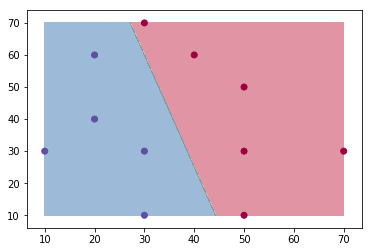

In [0]:
model.plot_decision_boundary()

<h2 id = 'bayes' height ="50" style='text-align: left'> Probabilidade Condicional  <img  src="Mídias/Imagens/prob_aula1.png" height ="50" width = "250"style = "float: right;" ></h2>

<h2 style = "padding: 0px,"> Probabilistic Classifier</h2>
<p>Essa função <strong>recebe </strong> 3: </p>
<ol>
    <li> trainx, uma matriz nxd onde "n" é o número de observações (número de pacientes já avaliados) e "d" as características observadas ( exames)</li>
    <li> trainy, um vetor de tamanho n, que contém o labél ( diagnóstico 'doente ou não' ) de cada paciente avaliado</li>
    <li> x, um vetor do Rd contendo os resultados dos exames de um novo paciente</li>
</ol> 
<p> Essa função <strong>retorna</strong> o label ( diagnóstico 'doente ou não') para x, baseada na maior probabilidade de A (Variável aleatória = label) dado que  B ocorreu (Variável aleatória = exames), sob a premissa de que os eventos são dependentes </p>

In [0]:
def probabilistic_classifier(trainx,trainy,x):
    """P(A = Doentes) = Qtd Doentes/total de pacientes e
       P(A = Não Doentes) = Qtd Não Doentes/ total de pacientes"""
    P_As = np.array(trainy.value_counts(normalize=True))
    
    """Para sabermos a P(B = resultados dos exames|A =  Doente ou Não doente), devemos encontrar qual a familia
    de distribuições que melhor representa os resultados dos exames dos pacientes Doentes e dos pacientes Não Doentes"""
    
    """Adotando uma distribuição gaussiana a função de densidade de probabilidade normal é representada por mu (média)
    e sigma (variancia)"""
    
    """Como B não é unidimensional, mu será um vetor Rn, onde n é a quantidade de exames(2) e sigma será uma matriz de
    covariancia contendo na sua diagonal principal as variancias de cada exame"""
    trainx=np.array(trainx)
    trainy=np.array(trainy)
    
    mu = np.array([np.mean(trainx[trainy==i],axis=0) for i in np.unique(trainy)])
    sigma = np.array([np.cov(trainx[trainy==i],rowvar = False,bias = True) for i in np.unique(trainy)])
    
    """P(A|B) = P(A).P(B|A)/ P(B) 
    onde P(B) é a probabilidade total P(A = Doente).P(B|A = Doente) +  P(A = Não Doente).P(B|A = Não Doente)"""
    """Como o denomindor é comum para todas as situações, podemos retirá-lo da expressão e tomar o log dela"""
    
    P_AB = np.array([np.log(P_As[i])+multivariate_normal.logpdf(x=x,mean=mu[i],cov = sigma[i])\
                     for i in range(P_As.shape[0])])
   
    index_maxprob = np.argmax(P_AB)
    #print(np.unique(trainy)[index_maxprob])
    if np.unique(trainy)[index_maxprob] == 'Doente':
        return -1
    return 1


def view_prob(trainx,trainy):
    
    x1min = trainx.min()[0] - 1
    x1max = trainx.max()[0] + 1
    x2min = trainx.min()[1] - 1
    x2max = trainx.max()[1] + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    
    plt.plot(trainx.exame_1[(trainy=='Não Doente')], trainx.exame_2[(trainy=='Não Doente')], 'ro')
    plt.plot(trainx.exame_1[(trainy=='Doente')], trainx.exame_2[(trainy=='Doente')], 'k^')
    plt.legend(['Não Doente','Doente'])
    plt.xlabel('Exame 2')
    plt.ylabel('Exame 1')
    
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([probabilistic_classifier(trainx,trainy,pt) for pt in grid])
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    
    plt.show()

<p><em>Exemplo</em><p>

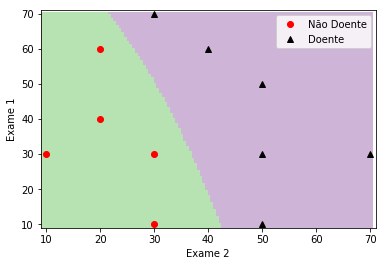

In [0]:
view_prob(data[['exame_1','exame_2']],data['Estado de Saude'])

<h1 style = 'color: #003366'> Vídeo Aula 2 - A aprendizagem é possível? </h1>

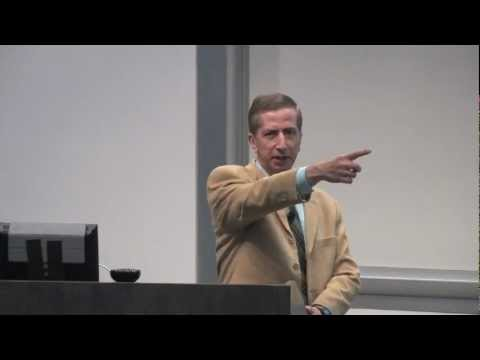

In [0]:
YouTubeVideo('MEG35RDD7RA',width=980, height=500)

# Homework aulas 1-2

In [3]:
IFrame('Mídias/Imagens/hw1.pdf', width=900, height=800)

## resolução homework

<h1 style = 'color: #003366'> Vídeo Aula 3 - O modelo linear 1 </h1>

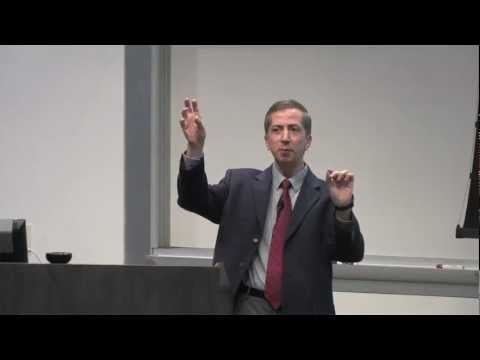

In [0]:
YouTubeVideo('FIbVs5GbBlQ',width=980, height=500)

In [0]:
def perceptron_clas(w,x):
    if (np.dot(w,x))>0: 
        out =  +1
    else:
        out = -1
        
    return out

In [0]:
w = np.array([1,-1])
x = np.array([1,3])

In [0]:
perceptron_clas(w,x)

1

In [0]:
np.sign(w @ x)

1

In [0]:
a = np.sign (data[['exame_1','exame_2']] @ w)

In [0]:
-1 and 0  in a

True

In [0]:
h = np.array([[1,0],[1,0],[0,1]])  @ np.array([1,0])*1

In [0]:
h

array([1, 1, 0])

In [0]:
np.where(h==0)

(array([2]),)

In [0]:
a = np.arange(10)

In [0]:
help(np.argwhere)

Help on function argwhere in module numpy.core.numeric:

argwhere(a)
    Find the indices of array elements that are non-zero, grouped by element.
    
    Parameters
    ----------
    a : array_like
        Input data.
    
    Returns
    -------
    index_array : ndarray
        Indices of elements that are non-zero. Indices are grouped by element.
    
    See Also
    --------
    where, nonzero
    
    Notes
    -----
    ``np.argwhere(a)`` is the same as ``np.transpose(np.nonzero(a))``.
    
    The output of ``argwhere`` is not suitable for indexing arrays.
    For this purpose use ``where(a)`` instead.
    
    Examples
    --------
    >>> x = np.arange(6).reshape(2,3)
    >>> x
    array([[0, 1, 2],
           [3, 4, 5]])
    >>> np.argwhere(x>1)
    array([[0, 2],
           [1, 0],
           [1, 1],
           [1, 2]])



In [0]:
a

array([[  1.,  31.,  71.],
       [  1.,  41.,  61.],
       [  1.,  51.,  11.],
       [  1.,  51.,  31.],
       [  1.,  51.,  51.],
       [  1.,  71.,  31.],
       [  1.,  31.,  11.],
       [  1.,  31.,  31.],
       [  1.,  21.,  41.],
       [  1.,  11.,  31.],
       [  1.,  21.,  61.]])

In [0]:
a[np.argwhere(a>5)]

array([[[  1.,  31.,  71.],
        [  1.,  41.,  61.]],

       [[  1.,  31.,  71.],
        [  1.,  51.,  11.]],

       [[  1.,  41.,  61.],
        [  1.,  41.,  61.]],

       [[  1.,  41.,  61.],
        [  1.,  51.,  11.]],

       [[  1.,  51.,  11.],
        [  1.,  41.,  61.]],

       [[  1.,  51.,  11.],
        [  1.,  51.,  11.]],

       [[  1.,  51.,  31.],
        [  1.,  41.,  61.]],

       [[  1.,  51.,  31.],
        [  1.,  51.,  11.]],

       [[  1.,  51.,  51.],
        [  1.,  41.,  61.]],

       [[  1.,  51.,  51.],
        [  1.,  51.,  11.]],

       [[  1.,  71.,  31.],
        [  1.,  41.,  61.]],

       [[  1.,  71.,  31.],
        [  1.,  51.,  11.]],

       [[  1.,  31.,  11.],
        [  1.,  41.,  61.]],

       [[  1.,  31.,  11.],
        [  1.,  51.,  11.]],

       [[  1.,  31.,  31.],
        [  1.,  41.,  61.]],

       [[  1.,  31.,  31.],
        [  1.,  51.,  11.]],

       [[  1.,  21.,  41.],
        [  1.,  41.,  61.]],

       [[  1.,

In [0]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
if not a.all(axis = 0):
    print('entrou')

entrou


In [0]:
np.all(a)

False

In [0]:
help(np.all)

Help on function all in module numpy.core.fromnumeric:

all(a, axis=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Test whether all array elements along a given axis evaluate to True.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a logical AND reduction is performed.
        The default (`axis` = `None`) is to perform a logical AND over all
        the dimensions of the input array. `axis` may be negative, in
        which case it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a reduction is performed on multiple
        axes, instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternate output array in which to place the result.
        It must have the same shape as the expected output and its
        type is